In [100]:
import matplotlib.pyplot as plt
import seaborn as sns

import numpy as np
import pandas as pd
import xarray as xr

import os
import math as m

In [101]:
from IPython.display import display,HTML
display(HTML('<style>.container {width: 80% !important}</style>'))

In [102]:
# directory = "C:/Users/user/Desktop/my_folder/t6_extra_output/"
# directory = "E:/Climate/t6/"
directory = "E:/Climate/t7_min/"

file_list = np.array ([file for file in os.listdir(directory) if file.endswith('.nc')])
# file_list

In [103]:
# Aggregating files by dictionaries: 
# timcor (2d spatial data), fldcor (array of values by timesteps), timmean (single value)
file_dict = {}
timcor = {}
fldcor = {}
timmean = {}
tr_A = {}
tr_B = {}
for file in file_list:
    dataset = xr.open_dataset(os.path.join(directory, file), decode_times=False)
    file_dict[file] = dataset
    if 'ERA5' in file:
         continue
    if 'timcor' in file:
        timcor[file] = dataset
    if 'fldcor' in file and not 'timmean' in file:
        fldcor[file] = dataset
    if 'timmean' in file:
        timmean[file] = dataset
    if 'fldmean_trend1' in file:
        tr_A[file.split('trend1')[1]] = dataset
    if 'fldmean_trend2' in file:
        tr_B[file.split('trend2')[1]] = dataset

In [104]:
# file = 'tas_Amon_ACCESS-CM2_ssp585_r1i1p1f1_185001-210012_r360x180_remap_C_regular_axis_year_anom_box_ymean.nc'
file = 'trend2_ERA.nc'
# file_dict[file].t2m.values[0][0]

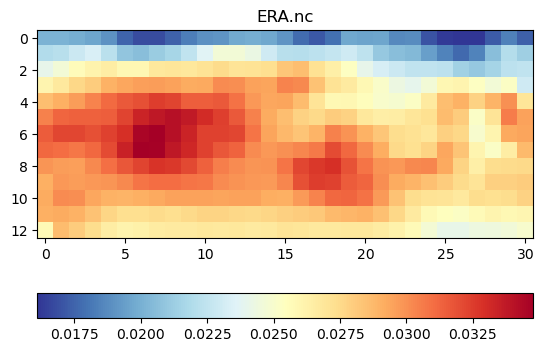

In [105]:
# Plotting single timcor
plt.title(file.split('_')[1], fontsize=12)
# plt.imshow(file_dict[file].t2m.values[0][0],  vmin=0, vmax=0.4, cmap='RdYlBu_r')
plt.imshow(file_dict[file].t2m.values[0][0], cmap='RdYlBu_r')


plt.colorbar(orientation='horizontal')
# plt.savefig("01.png")


In [352]:
def data_disp (keyword, stopword, data_dict, name_value, columns, n_lat, n_lon, pos_in_filename, title,
               scale_min, scale_max, fig_name):

    #### Displayig 25 timcors (data_dict) -- this will work only for 2d arrays with 1 timestep
    if keyword == '' and stopword == '':
        data_list = np.array([file for file in data_dict.keys()])
    elif stopword == '':
        data_list = np.array([file for file in data_dict.keys() if keyword in file])
    else:
        data_list = np.array([file for file in data_dict.keys() if (keyword in file and not stopword in file)])
    
    data_list = np.sort(data_list)
    n_subs = len(data_list)
    fig, ax = plt.subplots(n_subs//columns, columns, figsize=(11.7, 8.3), layout='constrained')
      
    fig.suptitle (title, fontsize=14)

    for i in range(n_subs):
        row = i // columns
        column = i % columns

        name = data_list[i].split('_')[pos_in_filename]
        array = data_dict[data_list[i]][name_value][0]
        
        if scale_min == scale_max:
            plotted = ax[row, column].imshow(array[::-1], cmap='RdYlBu_r')
        else:
            plotted = ax[row, column].imshow(array[::-1],  vmin=scale_min, vmax=scale_max, cmap='RdYlBu_r')
            
        ax[row, column].set_title(name, fontsize=10)

        if n_lat*n_lon != 0:
            # Counting how to place ticks
            longitudes = np.array (array['lon'], dtype='int')
            latitudes = np.array (array['lat'][0:180]+0.5, dtype='int')
            lon_step = len(longitudes)//(n_lon-1)
            lat_step = m.ceil(len(latitudes)/(n_lat))

            ax[row, column].tick_params(length=2, labelsize=6)
            ax[row, column].set_xticks(np.arange(0, len(longitudes), lon_step))
            ax[row, column].set_xticklabels(list(str(lon) + 'E' for lon in longitudes[::lon_step]))
            ax[row, column].set_yticks(np.arange(0, len(latitudes), lat_step))
            ax[row, column].set_yticklabels(list(str(lat) + 'N' for lat in latitudes[-1::-lat_step]))
            ax[row, column].grid(color='black', linestyle='dashed', linewidth=0.5, alpha=0.2)

    cbar = fig.colorbar(plotted, ax=ax, location='bottom', anchor=(0.5, 0), shrink=0.4, extend='both', orientation='horizontal')

    plt.show()
    if (fig_name != "" and "." in fig_name):    fig.savefig(fig_name)

In [107]:
# Open timcors from my directory
i = 0
for file in file_dict.keys():
    if ('timcor' in file and not '__' in file):
        print (file)
        i+=1
i

timcor_tas_Amon_UKESM1-0-LL_ssp585_r1i1p1f2_185001-210012_r360x180_remap_C_regular_axis_year_anom_box_ymean.nc
timcor_tas_Amon_ACCESS-ESM1-5_ssp585_r1i1p1f1_185001-210012_r360x180_remap_C_regular_axis_year_anom_box_ymean.nc
timcor_tas_Amon_AWI-CM-1-1-MR_ssp585_r1i1p1f1_185001-210012_r360x180_remap_C_regular_axis_year_anom_box_ymean.nc
timcor_tas_Amon_EC-Earth3_ssp585_r1i1p1f1_185001-210012_r360x180_remap_C_regular_axis_year_anom_box_ymean.nc
timcor_tas_Amon_NorESM2-MM_ssp585_r1i1p1f1_185001-210012_r360x180_remap_C_regular_axis_year_anom_box_ymean.nc
timcor_tas_Amon_TaiESM1_ssp585_r1i1p1f1_185001-210012_r360x180_remap_C_regular_axis_year_anom_box_ymean.nc


6

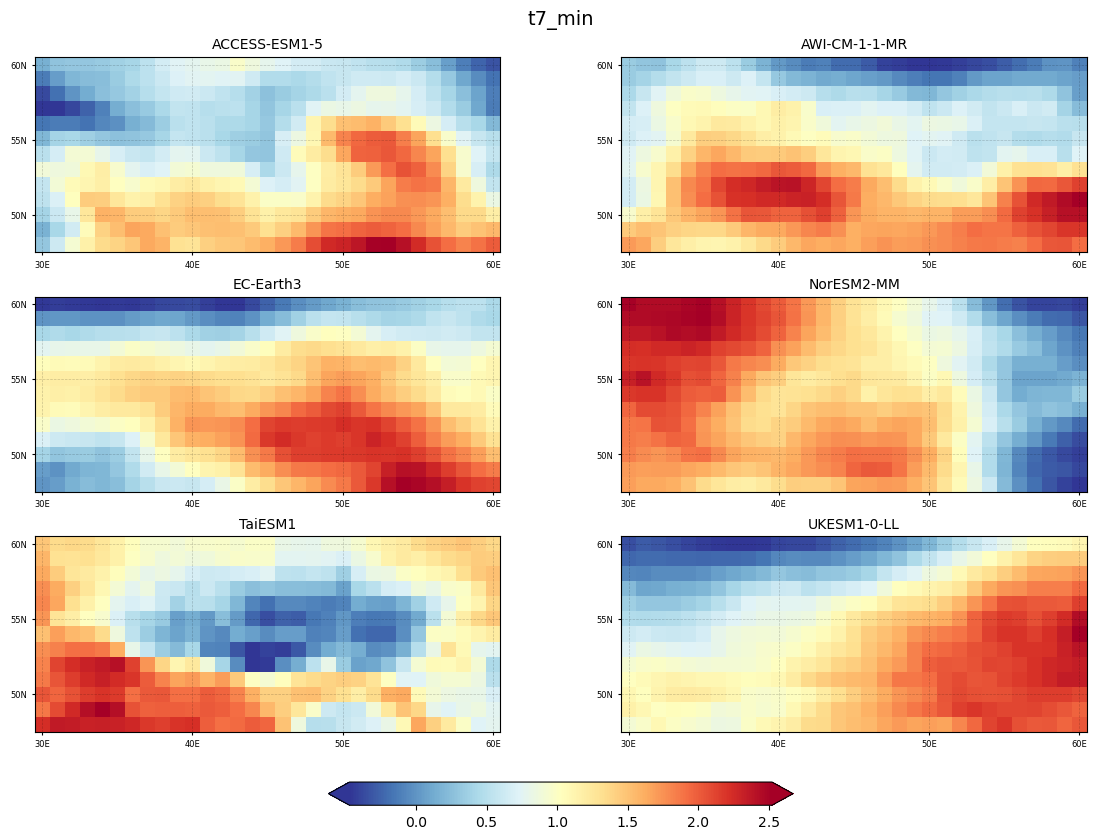

In [354]:
data_disp ('axis_year_anom_box_ymean.nc', '_tas', file_dict, 'tas', 2, 3, 4, 2, "t7_min", 0, 0, "")

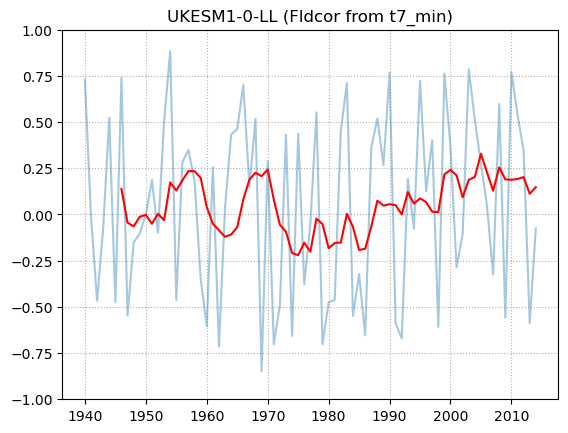

In [109]:
# Can convert everything into pd dataFrame while plotting single fldcor
file = 'fldcor_tas_Amon_UKESM1-0-LL_ssp585_r1i1p1f2_185001-210012_r360x180_remap_C_regular_axis_year_anom_box_ymean.nc'
df = fldcor[file].to_dataframe(['time', 'bnds', 'lon', 'lat']).reset_index()
step = 7
df = df[df['bnds'] == 1]

plt.plot(np.arange(1940, 2015,1), df['tas'], alpha=0.4)

roll = df.rolling(step).mean()
plt.plot(np.arange(1940, 2015,1), roll['tas'], linestyle='-', color='red')

plt.title(file.split('_')[3] + " (Fldcor from t7_min)")
plt.grid(linestyle=':')
plt.ylim(-1,1)
plt.show()

In [110]:
# Open fldcors from my directory
i = 0
for file in file_dict.keys():
    if ('fldcor' in file and not 'timmean' in file):
        print (file)
        i+=1
i

fldcor_tas_Amon_UKESM1-0-LL_ssp585_r1i1p1f2_185001-210012_r360x180_remap_C_regular_axis_year_anom_box_ymean.nc
fldcor_tas_Amon_ACCESS-ESM1-5_ssp585_r1i1p1f1_185001-210012_r360x180_remap_C_regular_axis_year_anom_box_ymean.nc
fldcor_tas_Amon_AWI-CM-1-1-MR_ssp585_r1i1p1f1_185001-210012_r360x180_remap_C_regular_axis_year_anom_box_ymean.nc
fldcor_tas_Amon_EC-Earth3_ssp585_r1i1p1f1_185001-210012_r360x180_remap_C_regular_axis_year_anom_box_ymean.nc
fldcor_tas_Amon_NorESM2-MM_ssp585_r1i1p1f1_185001-210012_r360x180_remap_C_regular_axis_year_anom_box_ymean.nc
fldcor_tas_Amon_TaiESM1_ssp585_r1i1p1f1_185001-210012_r360x180_remap_C_regular_axis_year_anom_box_ymean.nc


6

In [111]:
def data_plot (keyword, stopword, data_dict, columns, pos_in_filename, title, fig_name, step):

    #### Displayig 25 fldcor --- as 25 plots with y = value and x = time
    if keyword == '' and stopword == '':
        data_list = np.array([file for file in data_dict.keys()])
    elif stopword == '':
        data_list = np.array([file for file in data_dict.keys() if keyword in file])
    else:
        data_list = np.array([file for file in data_dict.keys() if (keyword in file and not stopword in file)])
    
    data_list = np.sort(data_list)
    n_subs = len(data_list)
    fig, ax = plt.subplots(n_subs//columns, columns, figsize=(11.7, 8.3), layout='constrained')
      
    fig.suptitle (title, fontsize=14)
    
    array = data_dict[data_list[0]]
    df = array.to_dataframe(['time', 'bnds', 'lon', 'lat']).reset_index()
    roll = df.rolling(step).mean()
    row = 0 // columns
    column = 0 % columns
    
    for i in range(n_subs):
        row = i // columns
        column = i % columns
        
        name = str('-'.join(data_list[i].split('_')[pos_in_filename:next((index for index, elem in enumerate(data_list[i].split('_')) if 'ssp' in elem), None)]))
        array = data_dict[data_list[i]]
        df = array.to_dataframe(['time', 'bnds', 'lon', 'lat']).reset_index()
        df = df[df['bnds'] == 1]
        
        ax[row, column].plot(np.arange(1940, 2015), df['tas'], alpha=0.6)
        
        ax[row, column].set_ylim(-1, 1)  
        ax[row, column].set_title(name, fontsize=10)
        ax[row, column].tick_params(length=2, labelsize=6)

        if step > 1:
            df = array.to_dataframe(['time', 'bnds', 'lon', 'lat']).reset_index()
            df = df[df['bnds'] == 1]
            
            roll = df.rolling(step).mean()
            ax[row, column].plot(np.arange(1940, 2015), roll['tas'], linestyle='-', color='red')


        ax[row, column].grid(color='black', linestyle='dotted', linewidth=0.5, alpha=0.4)
    plt.show()
    if (fig_name != "" and "." in fig_name):    fig.savefig(fig_name)

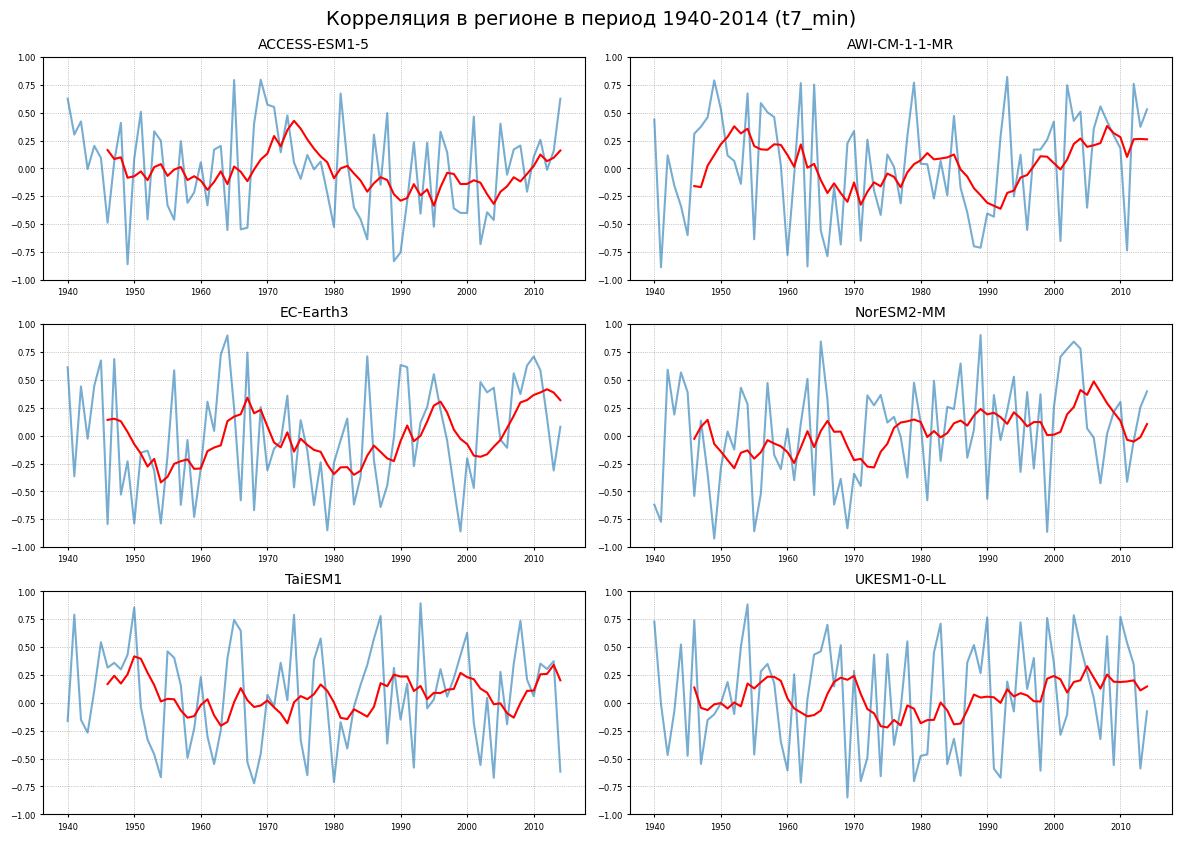

In [112]:
data_plot ('fldcor', 'timmean', file_dict, 2, 3, "Корреляция в регионе в период 1940-2014 (t7_min)", "", 7)

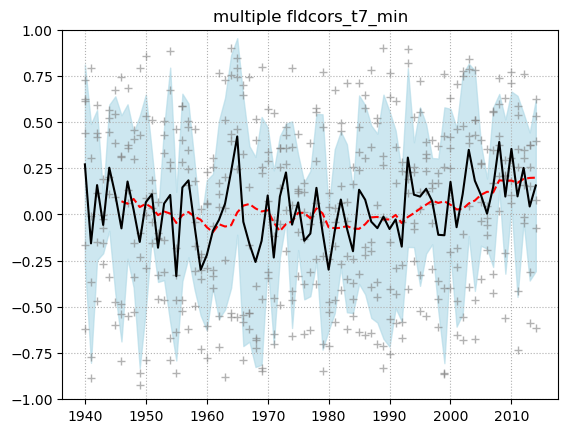

In [114]:
# Plotting many fldcors on one plot
step = 7
df = df[df['bnds'] == 1]
dfs = []
for file in list(fldcor.keys()):
    df = file_dict[file].to_dataframe(['time', 'bnds', 'lon', 'lat']).reset_index()
    df = df[df['bnds'] == 1]
    dfs.append(df)
    plt.plot(np.arange(1940, 2015,1), df['tas'], alpha=0.6, marker='+', linestyle="none", color='gray')

    roll = df.rolling(step).mean()
#     plt.plot(np.arange(1940, 2015,1), roll['tas'], linestyle='--', alpha=0.4)

df_conc = pd.concat(dfs, axis=1)
roll_conc = df_conc.tas.mean(axis=1).rolling(step).mean()

plt.plot(np.arange(1940, 2015,1), roll_conc, linestyle='--', alpha=1, color='red')
plt.plot(np.arange(1940, 2015,1), df_conc.tas.mean(axis=1), linestyle='-', alpha=1, color='black')
plt.fill_between(np.arange(1940, 2015,1), df_conc.tas.mean(axis=1)+df_conc.tas.std(axis=1), df_conc.tas.mean(axis=1)-df_conc.tas.std(axis=1), color='lightblue', alpha=0.6)

plt.title("multiple fldcors_t7_min")
plt.grid(linestyle=':')
plt.ylim(-1,1)
plt.show()
# plt.savefig("many_fldcors_t7_min.png")

In [113]:
file1 = 'fldcor_tas_Amon_ACCESS-CM2_ssp585_r1i1p1f1_185001-210012_r360x180_remap_C_regular_axis_year_anom_box_ymean.nc'
file2 = 'fldcor_tas_Amon_ACCESS-ESM1-5_ssp585_r1i1p1f1_185001-210012_r360x180_remap_C_regular_axis_year_anom_box_ymean.nc'
# df = file_dict[file1].to_dataframe(['time', 'bnds', 'lon', 'lat']).reset_index()

# Testing algorythm for mean
df1 = file_dict[file1].to_dataframe(['time', 'bnds', 'lon', 'lat']).reset_index()
df2 = file_dict[file2].to_dataframe(['time', 'bnds', 'lon', 'lat']).reset_index()
df1 = df1[df1['bnds'] == 1]
df2 = df2[df2['bnds'] == 1]
df_conc = pd.concat((df1, df2), axis=1)
df_conc.tas.mean(axis=1).plot(color='C3')
df1.tas.plot(alpha=0.3)
df2.tas.plot(alpha=0.3)
plt.xlim(40, 60)
plt.show()
# type((df1, df2))

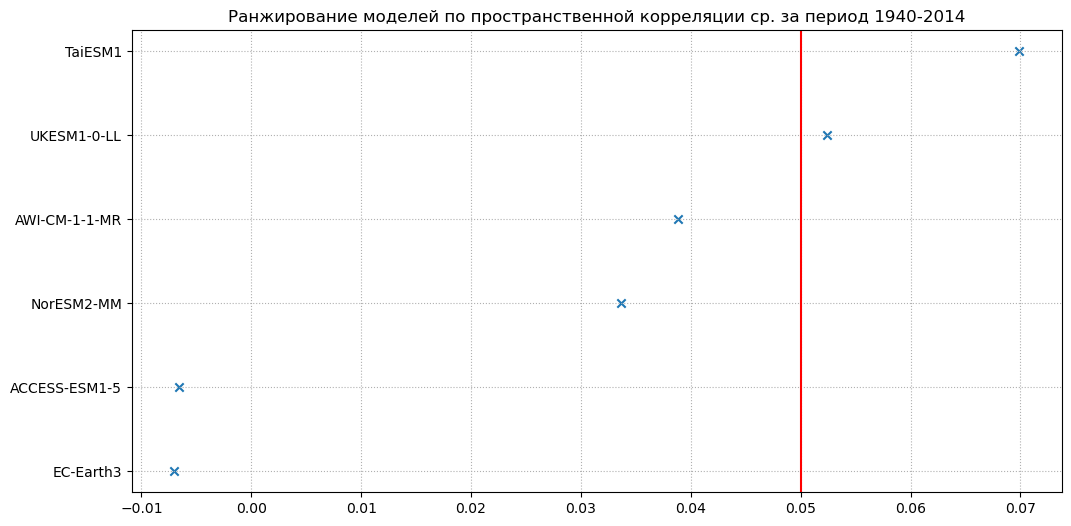

,model,timmean,slope
0,UKESM1-0-LL,0.052351,NaN
1,ACCESS-ESM1-5,-0.006542,NaN
2,AWI-CM-1-1-MR,0.03886,NaN
3,EC-Earth3,-0.007031,NaN
4,NorESM2-MM,0.033662,NaN
5,TaiESM1,0.069906,NaN
6,ERA,1,0


In [316]:
# Ranking models
model_df = pd.DataFrame(columns=['model', 'timmean', 'slope'])

plt.figure(figsize=(12, 6))

# file = 'timmean_fldcor_tas_Amon_ACCESS-CM2_ssp585_r1i1p1f1_185001-210012_r360x180_remap_C_regular_axis_year_anom_box_ymean.nc'
for i, file in enumerate(file_list):  
    if 'timmean' in file:
        model_df.loc[i, 'model'] = file.split('_')[4]
        model_df.loc[i, 'timmean'] = file_dict[file].tas.values[0][0][0]
timmean_sorted = model_df.sort_values(by='timmean').reset_index()

plt.scatter(timmean_sorted['timmean'], timmean_sorted.index, marker='x', )

plt.yticks(timmean_sorted.index, timmean_sorted['model'])
plt.grid(linestyle=':')
plt.axvline(x=0.05, color='red', linestyle='-')
plt.title("Ранжирование моделей по пространственной корреляции ср. за период 1940-2014")

plt.show()
# plt.savefig("timmean_t7_min.png")


rean = pd.DataFrame(columns=['model', 'timmean', 'slope'])
rean.loc[0,:] = ['ERA', 1, 0]

model_df = pd.concat((model_df, rean), ignore_index=True)
model_df

In [317]:
# Display trends in anomalies_box_yearmean
file_a = 'trend1_ERA.nc'
file_b = 'trend2_ERA.nc'
mean_a = 'fldmean_tr1_ERA.nc'
mean_b = 'fldmean_tr2_ERA.nc'

a = file_dict[file_a].t2m.values[0][0]
b = file_dict[file_b].t2m.values[0][0]

conc_y = []
x = np.linspace (0, 200, 75)

# # for each pixel its own trend
# for i in range(len(b[0][0])*len(b[0])):
#     y = a[0][i//len(b[0][0])][i%len(b[0])] + x*b[0][i//len(b[0][0])][i%len(b[0])]
#     conc_y.append(y)
#     plt.plot(x, y, color='blue', alpha=0.1, linestyle=':')

ma = file_dict[mean_a].t2m.values[0][0][0]
mb = file_dict[mean_b].t2m.values[0][0][0]
y = ma + mb*x

# plt.plot(x, y, alpha=0.9, linestyle='-', color='red')


In [318]:
index_of_element =int( model_df.index[model_df['model'] == 'ERA'].tolist()[0])
index_of_element
model_df

,model,timmean,slope
0,UKESM1-0-LL,0.052351,NaN
1,ACCESS-ESM1-5,-0.006542,NaN
2,AWI-CM-1-1-MR,0.03886,NaN
3,EC-Earth3,-0.007031,NaN
4,NorESM2-MM,0.033662,NaN
5,TaiESM1,0.069906,NaN
6,ERA,1,0


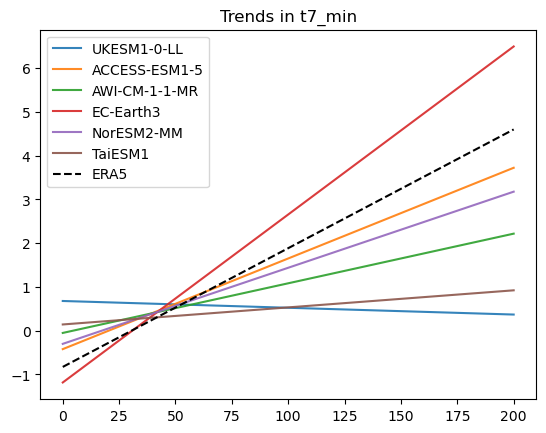

,model,timmean,slope
0,UKESM1-0-LL,0.052351,-0.001549
1,ACCESS-ESM1-5,-0.006542,0.020709
2,AWI-CM-1-1-MR,0.03886,0.011338
3,EC-Earth3,-0.007031,0.03837
4,NorESM2-MM,0.033662,0.017379
5,TaiESM1,0.069906,0.003899
6,ERA,1,0.02711794628891278


In [319]:
x = np.linspace (0, 200, 75)
for file in list(tr_A.keys()):
    model_df.loc[int( model_df.index[model_df['model'] == file.split('_')[3]].tolist()[0]),'slope'] = tr_B[file].tas.values[0][0][0]
    
    y = tr_A[file].tas.values[0][0][0] + tr_B[file].tas.values[0][0][0]*x
    plt.plot(x, y, alpha=0.9, linestyle='-', label=file.split('_')[3])
    plt.title("Trends in t7_min")
    plt.legend()
    
y = file_dict[mean_a].t2m.values[0][0][0] + file_dict[mean_b].t2m.values[0][0][0]*x
model_df.loc[int( model_df.index[model_df['model'] == 'ERA'].tolist()[0]), 'slope'] = file_dict[mean_b].t2m.values[0][0][0]
plt.plot(x, y, label='ERA5', color='black', linestyle='--')
plt.legend()
plt.show()
# plt.savefig("trends_t7_min_200.png")

model_df

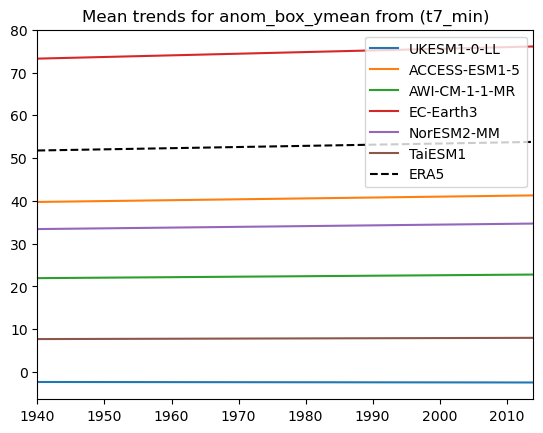

In [355]:
x = np.linspace(1940, 2014)

for file in list(tr_A.keys()):
    y = tr_A[file].tas.values[0][0][0] + tr_B[file].tas.values[0][0][0]*x
    plt.plot(x, y, linestyle='-', label=file.split('_')[3])

plt.xlim(1940, 2014)
plt.title("Mean trends for anom_box_ymean from (t7_min)")
y = file_dict[mean_a].t2m.values[0][0][0] + file_dict[mean_b].t2m.values[0][0][0]*x
plt.plot(x, y, label='ERA5', color='black', linestyle='--')
plt.legend()
# plt.show()


In [335]:
slope_sorted = model_df.sort_values(by='slope').reset_index()
slope_sorted

,index,model,timmean,slope
0,0,UKESM1-0-LL,0.052351,-0.001549
1,5,TaiESM1,0.069906,0.003899
2,2,AWI-CM-1-1-MR,0.03886,0.011338
3,4,NorESM2-MM,0.033662,0.017379
4,1,ACCESS-ESM1-5,-0.006542,0.020709
5,6,ERA,1,0.02711794628891278
6,3,EC-Earth3,-0.007031,0.03837
